In [1]:
# Install necessary libraries
!pip install pandas matplotlib seaborn

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('/content/traffic.csv')

In [4]:
# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [5]:
# Check basic info about the data
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [6]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [7]:
# Check duplicate records
print("\nDuplicate entries in the dataset:")
print(df.duplicated().sum())


Duplicate entries in the dataset:
0


In [8]:
# Convert 'DateTime' column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [9]:
# Set 'DateTime' as the index for time-series analysis
df.set_index('DateTime', inplace=True)

In [10]:
# Check data types after conversion
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
Junction    int64
Vehicles    int64
ID          int64
dtype: object


In [11]:
# Basic statistical description of the dataset
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
           Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10


In [12]:
# Check unique junctions in the data
print("\nUnique junctions in the dataset:")
print(df['Junction'].unique())


Unique junctions in the dataset:
[1 2 3 4]


In [13]:
#Rename columns for better readability
df.rename(columns={'Vehicles': 'vehicle_count'}, inplace=True)

In [14]:
# Final cleaned data preview
print("\nCleaned Data Preview:")
print(df.head())


Cleaned Data Preview:
                     Junction  vehicle_count           ID
DateTime                                                 
2015-11-01 00:00:00         1             15  20151101001
2015-11-01 01:00:00         1             13  20151101011
2015-11-01 02:00:00         1             10  20151101021
2015-11-01 03:00:00         1              7  20151101031
2015-11-01 04:00:00         1              9  20151101041


# **Exploratory Data Analysis (EDA) & Visualizations**


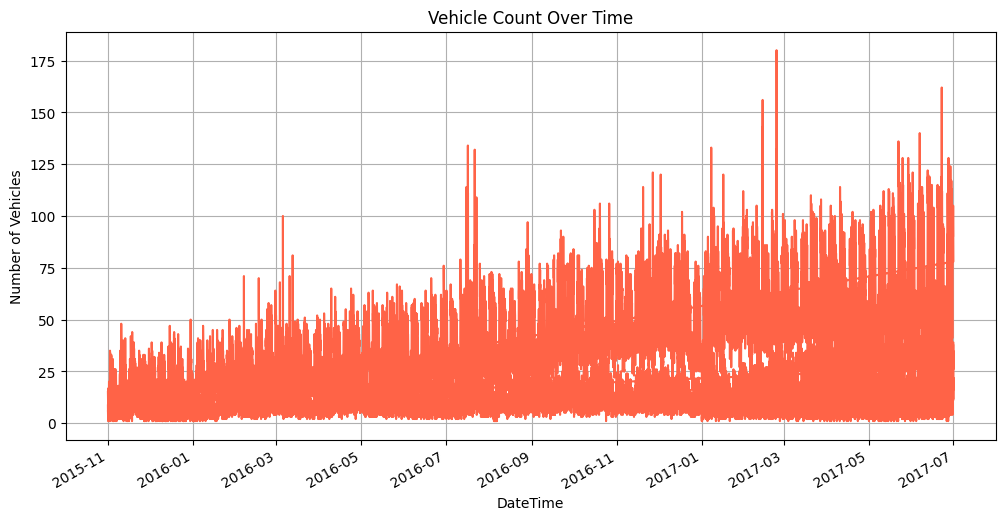

In [15]:
#Plot: Total Vehicle Count Over Time
plt.figure(figsize=(12,6))
df['vehicle_count'].plot(color='tomato')
plt.title('Vehicle Count Over Time')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

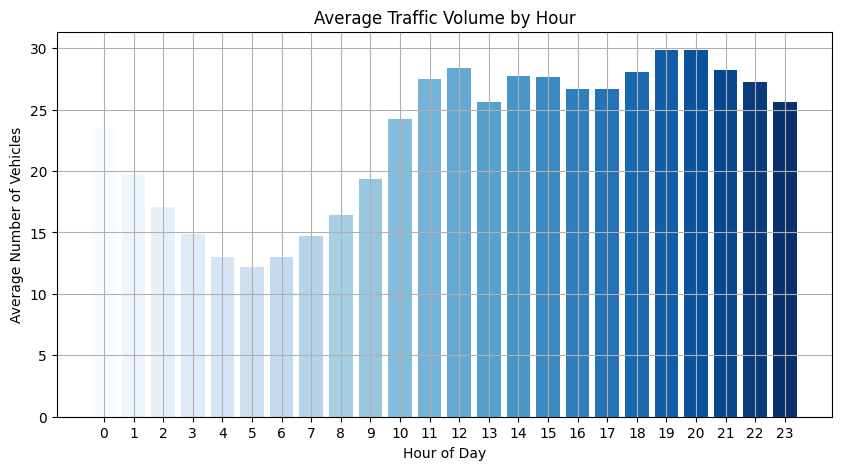

In [16]:
#Plot: Average Traffic by Hour of the Day
df['Hour'] = df.index.hour  # Extract hour from DateTime

plt.figure(figsize=(10,5))

# Group by hour and calculate mean vehicle count manually
hourly_data = df.groupby('Hour')['vehicle_count'].mean().reset_index()

# Plot manually using bar plot (avoiding seaborn's internal warnings)
plt.bar(hourly_data['Hour'], hourly_data['vehicle_count'], color=plt.cm.Blues(hourly_data['Hour'] / max(hourly_data['Hour'])))

plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Vehicles')
plt.grid(True)
plt.xticks(hourly_data['Hour'])  # Ensure all hour ticks are shown
plt.show()

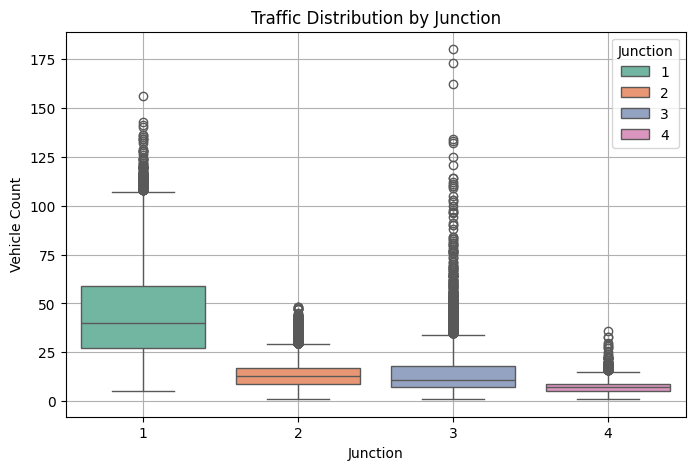

In [17]:
#Plot: Traffic Count by Junction
plt.figure(figsize=(8,5))
sns.boxplot(x='Junction', y='vehicle_count', hue='Junction', data=df, palette='Set2', dodge=False)
plt.title('Traffic Distribution by Junction')
plt.xlabel('Junction')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.legend(title='Junction')
plt.show()

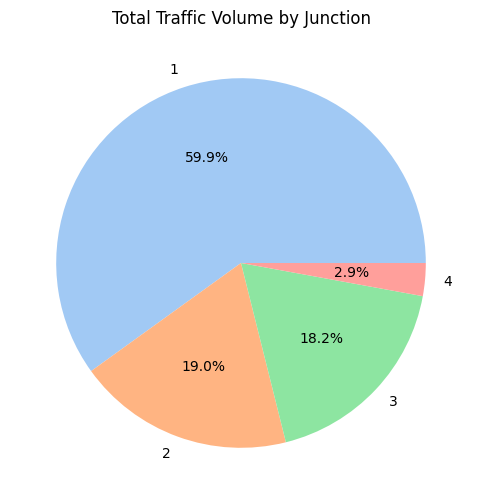

In [18]:
#Traffic Contribution by Each Junction (Total Volume)
plt.figure(figsize=(6,6))
df.groupby('Junction')['vehicle_count'].sum().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Total Traffic Volume by Junction')
plt.ylabel('')
plt.show()

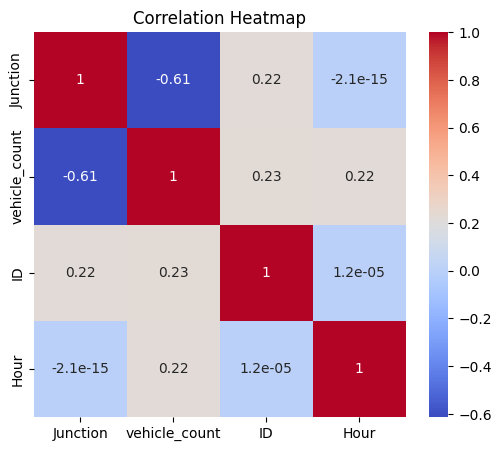

In [19]:
#Heatmap: Correlation Between Variables
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Basic Model Implementation**

***Traffic Volume Prediction Using Linear Regression***

In [20]:
# Install scikit-learn
!pip install scikit-learn

In [21]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Prepare data for model
# Use 'Hour' as feature and 'vehicle_count' as target
X = df['Hour'].values.reshape(-1, 1)  # Feature
y = df['vehicle_count'].values  # Target

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Create Linear Regression model
model = LinearRegression()

In [25]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 394.93652644306167
R-squared Score: 0.04580912467014586


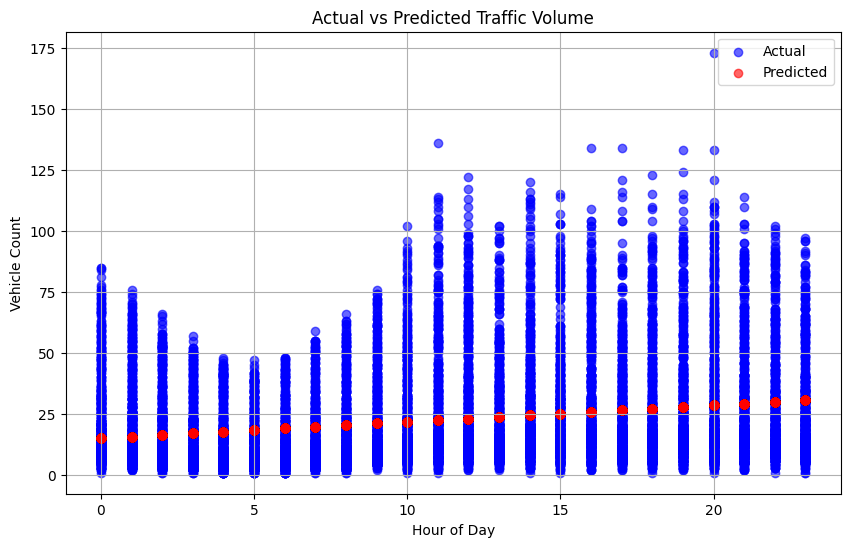

In [28]:
# Visualize actual vs predicted
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.show()